In [1]:
import sys
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
#from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image

%matplotlib inline
%run ch03LogisticRegression.ipynb

KeyboardInterrupt: 

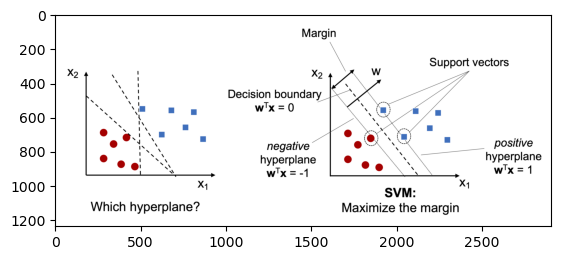

In [25]:
#感知机算法是为了最小化样本分类错误，SVM的优化目标是最大化分类间隔，这里的间隔被定义为分类超平面（决策边界）与据该超平面最近样本之间的距离，与分类超平面距离最近的训练样本被称为支持向量
#较大分类间隔往往使模型具有较低的泛化误差
img = Image.open('figures/03_09.png')
plt.imshow(img)

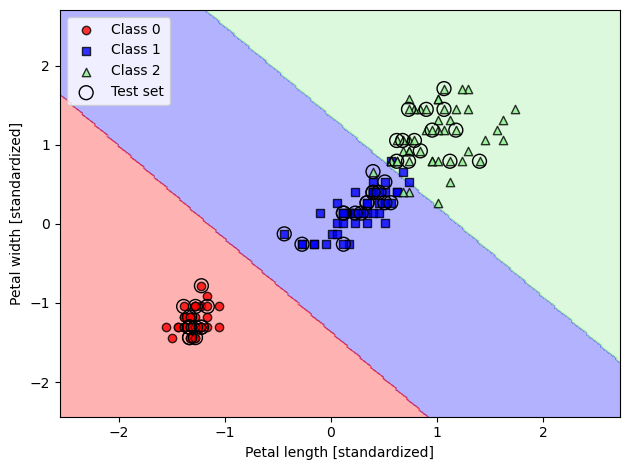

In [27]:
#引入松弛变量得到软分类间隔，对于非线性可分的数据，需要放松支持向量机优化问题的线性约束，以便在分类错误的情况下，适当调整损失惩罚，确保优化问题收敛
#引入变量C作为松弛变量，较大的C对应较大的错误惩罚，较小的C对错误要求就不那么严格，减小C值会增加模型的偏差，并降低模型的方差
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
#在实际的分类任务中，逻辑回归和线性SVM的结果通常非常相似

In [28]:
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

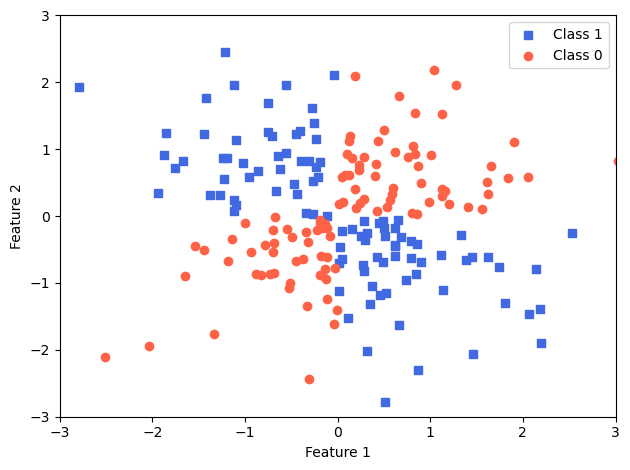

In [33]:
#SVM可以使用核求解非线性问题
#下例是一个非线性例子
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

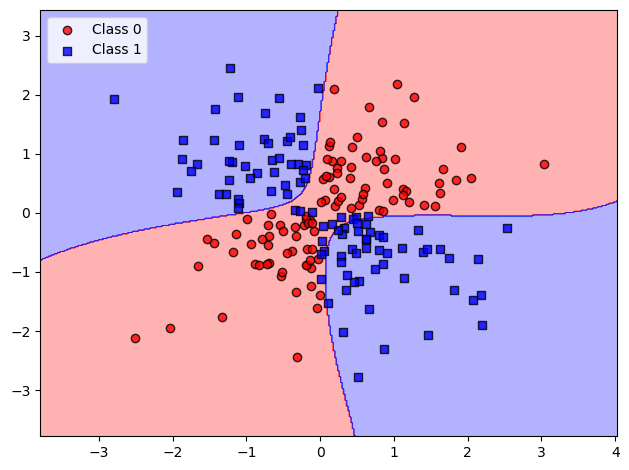

In [42]:
#核方法用于处理线性不可分数据，其背后思想是创建原始特征的非线性组合或映射函数，将原始特征投影到一个维度更高的空间，在高维空间中数据变得线性可分
#术语“核”可以解释为衡量一堆样本相似程度的函数，例如高斯核函数k（x^i, x^j） = exp(-γ||x^i, x^j||^2)
svm = SVC(kernel='rbf', random_state=1, gamma=0.20, C=10.0)
#此处设置gamma为0.1，若增加，会增加训练样本的影响力或影响范围，这会导致更严格更颠簸的决策边界，有可能会过拟合
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

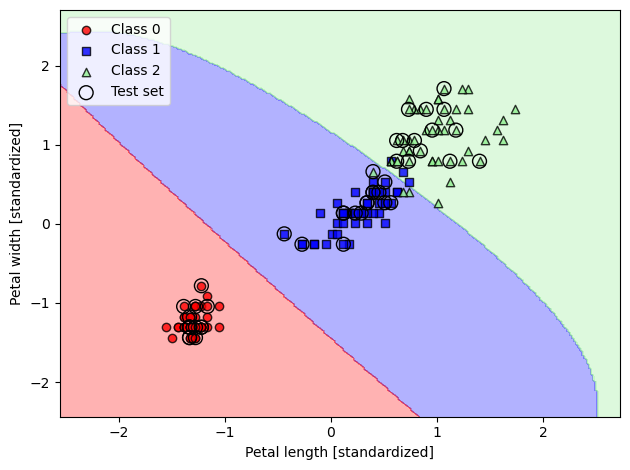

In [47]:
#SVM应用于鸢尾花数据集
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

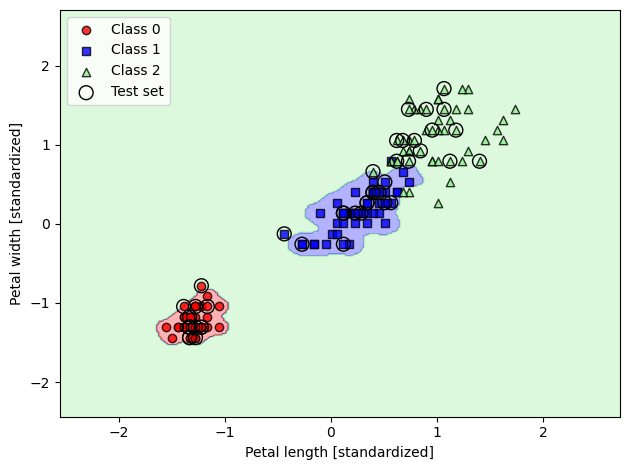

In [48]:
#上段使用的gamma为0.2，此处使用更大的gamma值100
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

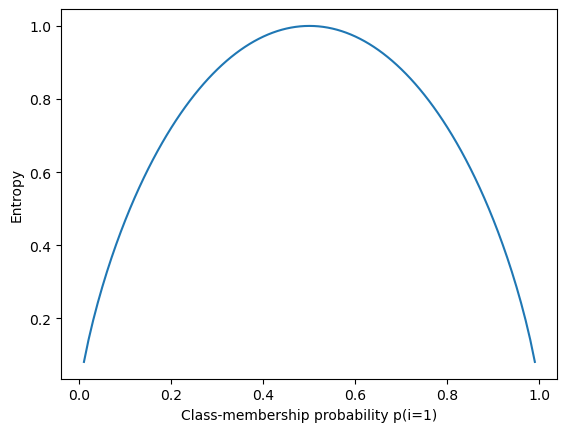

In [49]:
# # Decision tree learning
#基于训练数据集的特征，决策树模型通过学习一系列问题推断一个样本的类别标签
#实际应用中，由于子节点包含的所有训练样本一致，而树的深度很深时，容易导致过拟合，此时可以对其进行剪枝
#目标函数在每次分裂时最大化信息增益，定义为IG（Dp，f） = I（Dp）-∑(1~m)Nj/Np * I(Dj)，其中Dp和Dj分别是父节点和子节点包含的数据，I为杂质，通常有三种杂志，即基尼杂质Ig，熵IH和分类误差IE
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
#plt.savefig('figures/03_26.png', dpi=300)
plt.show()

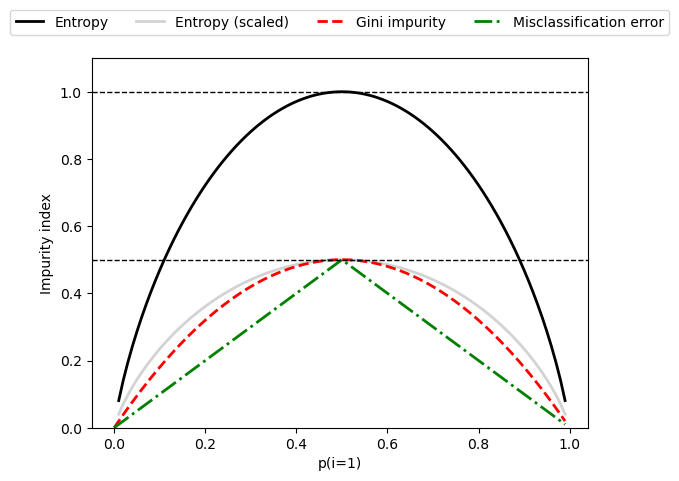

In [50]:
#基尼杂质和熵产生的杂质度量和分裂标准相似
#分类误差是修剪决策树的有用标准，但是不建议用于构建决策树
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]      #熵的缩放版本
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()

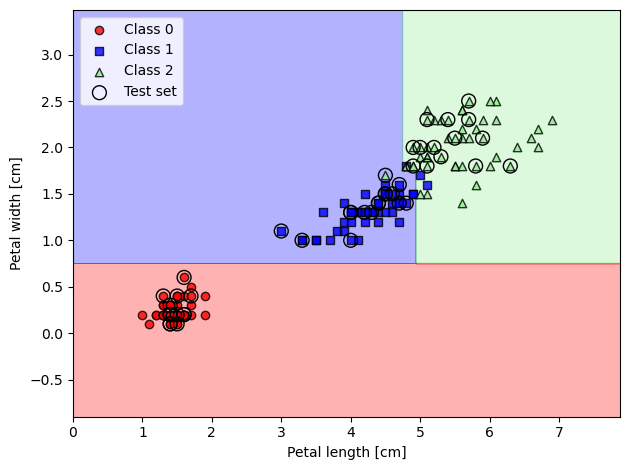

In [55]:
#构建一个树高为4的决策树
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

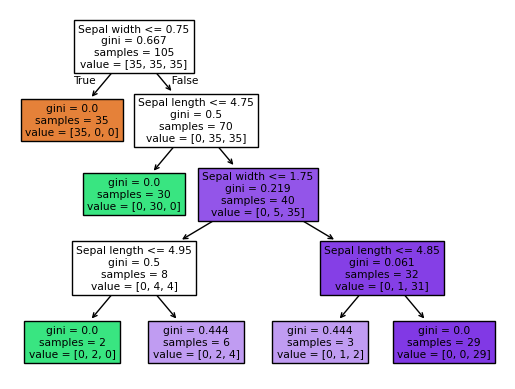

In [56]:
#scikitLearn自带的可视化决策树
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)

plt.show()

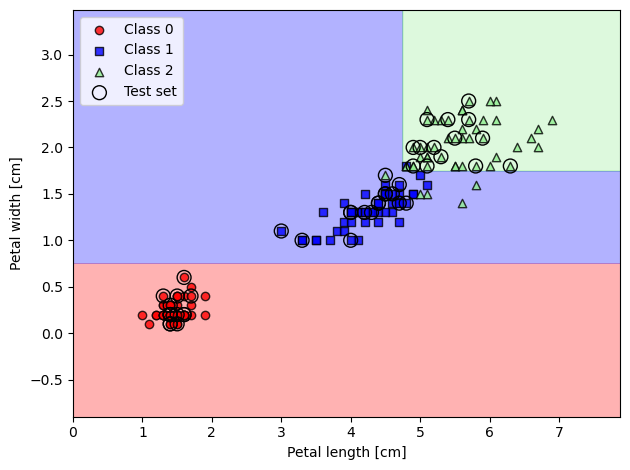

In [57]:
#构建一个树高为3的决策树
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

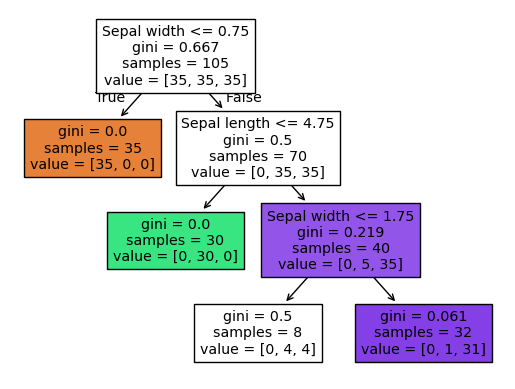

In [58]:
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)

plt.show()

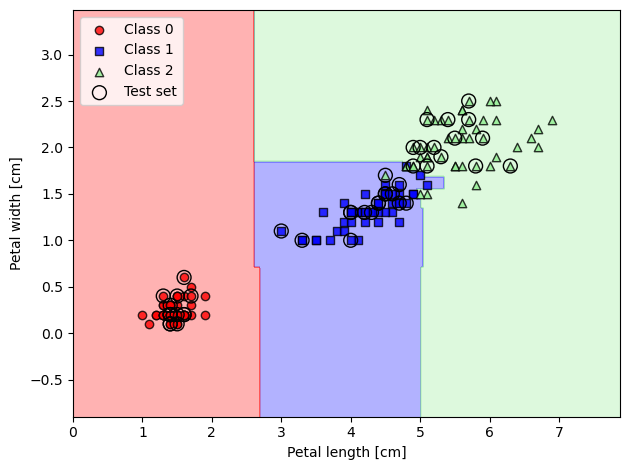

In [59]:
#多棵决策树可以组成随机森林，可以简单概括为四个简单步骤
#1.使用bootstrap抽取方法从训练数据集抽取n个样本（bootstrap抽取方法从训练集中有放回的随机抽取样本）
#2.使用上述抽取的样本训练一棵决策树
#2.a不放回地随机选取d个特征；
#2.b根据目标函数的要求，例如最大化信息增益，选择最佳特征分裂节点
#3.重复步骤1和步骤2k次
#4.给定一个样本，收集每棵决策树对这个样本的预测标签，投票决定最终预测标签。
#随机森林的可解释性不如决策树好，但随机森林的优势在于不必担心超参数的选择，决策树越多，随机森林分类器的性能越好，但计算成本越高
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)  #n_estimators用来指定构建几棵决策树
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()

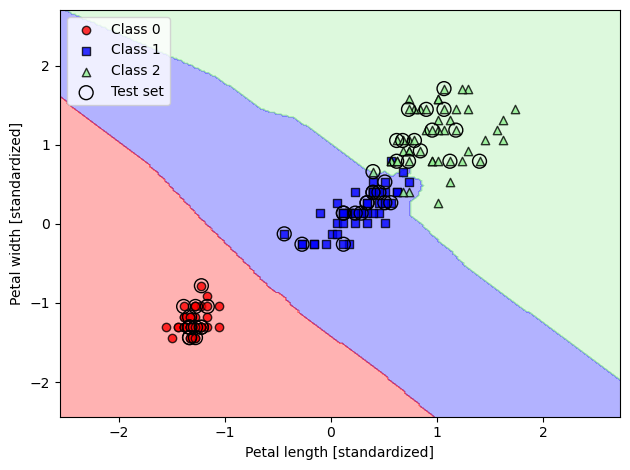

In [60]:
#KNN很容易因为维度灾难导致过拟合
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')  #此处使用的minkowski是欧式距离和曼哈顿距离的推广
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()